<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2023.02.06/CV/1_Pixel_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/2023W_CV"

# 1. 간단한 이미지 출력 

In [ ]:
# 영상처리 라이브러리
import cv2

# 수치 계산 라이브러리
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt

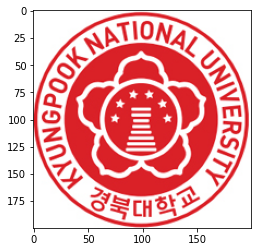

In [ ]:
# 이미지 파일의 이름
filename = 'images/KNU.jpg'

# OpenCV를 사용하여 영상 데이터 로딩
image = cv2.imread(filename)

# BGR 이미지를 RGB 이미지로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 캔버스에 이미지 출력
plt.imshow(image)

# 캔버스 출력
plt.show()

# 2. 컬러 채널처리


blue 
[[127 127 119 ... 128 124 104]
 [127 127 119 ... 130 126 105]
 [122 118 117 ... 106  96  80]
 ...
 [ 60  61  63 ...  68  73  73]
 [ 61  62  61 ...  78  80  78]
 [ 58  62  59 ...  84  81  80]]
배열의 속성 타입 =  <class 'numpy.ndarray'>
배열의 사이즈 =  220


(-0.5, 219.5, 219.5, -0.5)

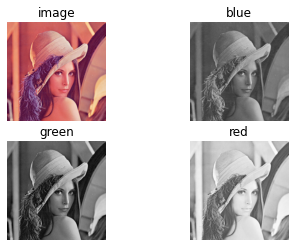

In [ ]:
import cv2

#칼라 이미지 로드
image = cv2.imread('images/Lenna.png', cv2.IMREAD_COLOR)

#bgr 변수에 이미지를 각각 분리해서 할당
bgr = cv2.split(image)

#3가지 채널을 각각 인덱싱해서 변수에 할당
blue = bgr[0]
green = bgr[1]
red = bgr[2]

#배열의 값, 배열의 타입, 배열의 길이 프린트확인
print('blue \n%s' % blue)
print('배열의 속성 타입 = ', type(blue))
print('배열의 사이즈 = ' ,len(blue))

fig = plt.figure()
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('image')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(cv2.cvtColor(blue, cv2.COLOR_BGR2RGB))
ax2.set_title('blue')
ax2.axis('off')

ax1 = fig.add_subplot(rows, cols, 3)
ax1.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))
ax1.set_title('green')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,4)
ax2.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB))
ax2.set_title('red')
ax2.axis('off')

(-0.5, 49.5, 49.5, -0.5)

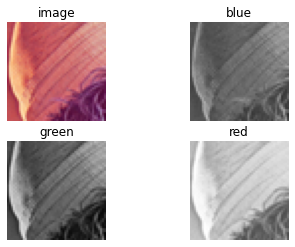

In [ ]:
fig = plt.figure()
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(image[50:100, 50:100], cv2.COLOR_BGR2RGB))
ax1.set_title('image')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(cv2.cvtColor(blue[50:100, 50:100], cv2.COLOR_BGR2RGB))
ax2.set_title('blue')
ax2.axis('off')

ax1 = fig.add_subplot(rows, cols, 3)
ax1.imshow(cv2.cvtColor(green[50:100, 50:100], cv2.COLOR_BGR2RGB))
ax1.set_title('green')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,4)
ax2.imshow(cv2.cvtColor(red[50:100, 50:100], cv2.COLOR_BGR2RGB))
ax2.set_title('red')
ax2.axis('off')

In [ ]:
print(red[50:100, 50:100])
print(green[50:100, 50:100])
print(blue[50:100, 50:100])

[[188 187 183 ... 217 214 219]
 [185 188 178 ... 216 216 215]
 [189 184 177 ... 218 214 213]
 ...
 [192 195 198 ... 133 123  76]
 [196 193 198 ... 117 142  83]
 [197 200 198 ... 127 163  92]]
[[ 75  77  69 ... 158 153 169]
 [ 77  77  66 ... 163 169 154]
 [ 77  76  61 ... 168 154 152]
 ...
 [ 80  82  78 ...  87  67   6]
 [ 82  81  80 ...  62 102  13]
 [ 81  83  84 ...  70 133  25]]
[[ 82  81  80 ... 145 142 155]
 [ 84  80  83 ... 155 159 140]
 [ 83  84  82 ... 157 147 147]
 ...
 [ 87  85  79 ... 123 115  50]
 [ 87  86  84 ... 108 147  61]
 [ 87  86  89 ... 120 168  71]]


#3. 화소에 직접 접근하기(반복문) 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

# 행렬 원소 직접 접근 방법. 
def mat_access1(mat):
  # 이미지의 사이즈 만큼 반복 (1, 1~size)
  for i in range(mat.shape[0]):
    # 이미지의 사이즈 만큼 반복 (1~size, 1~size)
    for j in range(mat.shape[1]):
      
      print(i,j) #임의의 화소가 반복문 도는 값을 출력. 

      # 각 원소 화소를 k변수에 할당. 
      k = mat[i,j] 
      #해당원소 k에 2를 곱해줌.
      mat[i,j] = k * 2 
  return mat # 함수 전달                

# 2차원 행렬 생성 (2 x 10 이미지라고 가정)
mat1 = np.arange(10).reshape(2,5) 
print('mat1\n', mat1)
mat_access1(mat1)
print('calculated_mat1\n',mat1)

mat1
 [[0 1 2 3 4]
 [5 6 7 8 9]]
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
calculated_mat1
 [[ 0  2  4  6  8]
 [10 12 14 16 18]]


# 4. 화소에 직접 접근하기(cv2.itemset 사용) 


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

# 원소 직접접근 - open cv의 item() 함수 사용
def mat_access2(mat): 
  # 이미지의 사이즈 만큼 반복 (1, 1~size)
  for i in range(mat.shape[0]):
    # 이미지의 사이즈 만큼 반복 (1~size, 1~size)
    for j in range(mat.shape[1]):

      # open cv 원소 선택 함수 item 제공
      k = mat.item(i,j)
      # 각선택된 원소에 2를 곱해줌.
      mat.itemset((i,j), k* 2)

  return mat

# 2차원 행렬 생성 (2 x 10 이미지라고 가정)
mat2 = np.arange(10).reshape(2,5) 
print('mat2\n', mat2)
mat_access2(mat2)
print('calculated_mat2\n',mat2)

mat2
 [[0 1 2 3 4]
 [5 6 7 8 9]]
calculated_mat2
 [[ 0  2  4  6  8]
 [10 12 14 16 18]]


#5. 직접접근과 cv2 함수 간 계산효율성 비교 

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

#이미지로드 RGB -> Gray
image = cv2.imread('images/Lenna.png',cv2.IMREAD_GRAYSCALE) 

def pixel_subtract(image):

  # 이미지의 넓이 높이 크기의 0행렬 생성
  image1 = np.zeros(image.shape[:2], image.dtype) 
  # 이미지의 사이즈 만큼 반복 (1, 1~size)
  for i in range(image.shape[0]):
    # 이미지의 사이즈 만큼 반복 (1~size, 1~size)
    for j in range(image.shape[1]):
    
      # 각 원소를 pixel이라는 변수에 할당
      pixel = image[i,j]
      # 각원소의 값을 255에서 빼줌
      image1[i,j] = 255 - pixel

  return image1

def pixel_subtract_cv(image):

  #cv2에서 제공하는 함수를 활용 감산
  image = cv2.subtract(255, image)# 

  return image

# 시간체크할 수 있는 함수 생성
def time_check(func,msg): 
  #프로그램 시작부터 시간을 계산하는 함수
  start_time = time.perf_counter()

  #pixel_subtract 함수가 적용됌
  ret_img = func(image)

  # 프로그램이 시작할때와 끝날때까지의 시간 계산
  elapsed = (time.perf_counter() - start_time) * 1000 
  print(msg, '수행시간 : %0.2f ms' % elapsed)

  return ret_img

cal_element = time_check(pixel_subtract, '화소에 직접 접근했을때의 시간')
cal_opencv = time_check(pixel_subtract_cv, 'opencv 활용한 계산시간')

화소에 직접 접근했을때의 시간 수행시간 : 110.63 ms
opencv 활용한 계산시간 수행시간 : 8.04 ms


#6. 화소 밝기 변환 

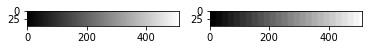

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 50X512 임의의 행렬 생성
image1 = np.zeros((50,512), np.uint8) 
# 50X512 임의의 행렬 생성
image2 = np.zeros((50,512), np.uint8) 

rows, cols = image1.shape[:2] # 행과 열 크기를 각각 할당

 #행 크기만큼 반복
for i in range(rows):
  #열 크기만큼 반복
  for j in range(cols): 

    # 화소값 점진적 증가
    image1.itemset((i,j), j // 2)
    # 계단 현상 증가
    image2.itemset((i,j), j // 20*10) 

# 그리드 생성 이미지 출력 subplot 생성
fig = plt.figure() 
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image1, 'gray')

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(image2, 'gray')

# 7. 영상밝기 가감연산 

(-0.5, 317.5, 158.5, -0.5)

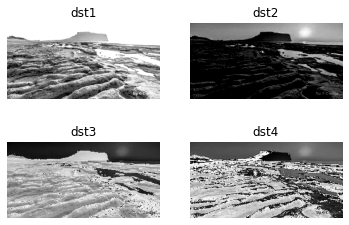

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#가감 변환
image = cv2.imread('images/scene.png', 
                   cv2.IMREAD_GRAYSCALE)        

# 각원소에 가산(saturaton 방식)
dst1 = cv2.add(image,100) 

# 각원소에 감산(saturaton 방식)
dst2 = cv2.subtract(image,100) 

# 나머지 연산(modulo 방식)
dst3 = image + 100 
dst4 = image -100 

# 사진을 담기위한 그리드 생성 2X2
fig = plt.figure() 
rows = 2
cols = 2

# 2X2 그리드에 각각의 4장의 사진 출력
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(dst1, 'gray')
ax1.set_title('dst1')
ax1.axis('off')# 격자 모드 off

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

ax3 = fig.add_subplot(rows,cols,3)
ax3.imshow(dst3, 'gray')
ax3.set_title('dst3')
ax3.axis('off')

ax4 = fig.add_subplot(rows,cols,4)
ax4.imshow(dst4, 'gray')
ax4.set_title('dst4')
ax4.axis('off')

#8. 행렬 덧셈을 이용한 영상합성

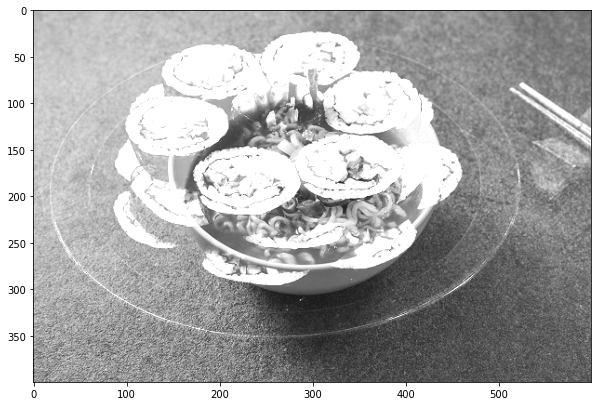

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 행렬덧셈 및 곱셈을 이용한 영상 합성
image = cv2.imread('images/김밥.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/라면.png', cv2.IMREAD_GRAYSCALE)

#두영상 단순합산
add_img1 = cv2.add(image, image2)

plt.figure(figsize=(10, 10))
plt.imshow(add_img1, 'gray', vmin=0, vmax=255)

plt.show()

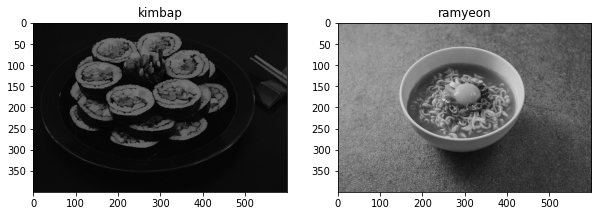

In [ ]:
# 알파베타 비율값 임의 산정
alpha, beta = 0.5, 0.85

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image * alpha, 'gray', vmin=0, vmax=255)
plt.title('kimbap')

plt.subplot(1, 2, 2)
plt.imshow(image2 * beta, 'gray', vmin=0, vmax=255)
plt.title('ramyeon')

plt.show()

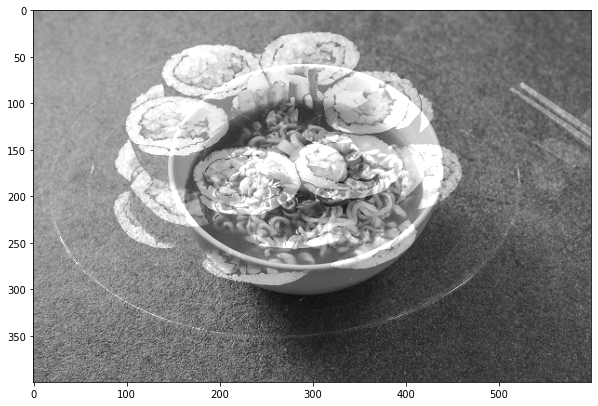

In [ ]:
#두영상 비율에 따른 합산
add_img2 = cv2.add(image * alpha, image2 * beta)

plt.figure(figsize=(10, 10))
plt.imshow(add_img2, 'gray', vmin=0, vmax=255)

plt.show()

# 9. 명암대비

(-0.5, 317.5, 158.5, -0.5)

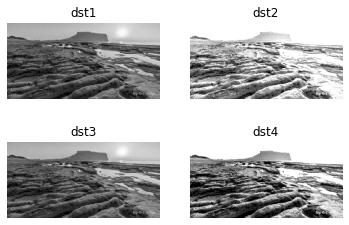

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 명암 대비
image = cv2.imread('images/scene.png', cv2.IMREAD_GRAYSCALE)

# 더미 영상(인자 할당 채우기용)생성
noimage = np.zeros(image.shape[:2], image.dtype)  
# 영상 화소 평균의 절반
avg = cv2.mean(image)[0]/2.0                       

# 명암 2배로 낮추기
dst1 = cv2.scaleAdd(image, 0.5, noimage)
 # 명암 2배로 높이기 
dst2 = cv2.scaleAdd(image, 2.0, noimage)

# 명암 대비 감소 평균값 추가
dst3 = cv2.addWeighted(image, 0.5, noimage,0,avg)  
# 명암 대비 증가 평균값 감소
dst4 = cv2.addWeighted(image, 2.0, noimage,0,-avg) 

#이미지 그리기
fig = plt.figure()
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(dst1, 'gray')
ax1.set_title('dst1')
ax1.axis('off')                                 

ax2 = fig.add_subplot(rows,cols,2)
ax2.imshow(dst2, 'gray')
ax2.set_title('dst2')
ax2.axis('off')

ax3 = fig.add_subplot(rows,cols,3)
ax3.imshow(dst3, 'gray')
ax3.set_title('dst3')
ax3.axis('off')

ax4 = fig.add_subplot(rows,cols,4)
ax4.imshow(dst4, 'gray')
ax4.set_title('dst4')
ax4.axis('off')